**STATCAST LAUNCH ANGLE ANALYSIS**

We use stats from Statcast to find which launch angle yields the most homeruns

In [ ]:
pip install helium

     |████████████████████████████████| 26.1 MB 30 kB/s 
  Created wheel for helium: filename=helium-3.0.7-py3-none-any.whl size=26136186 sha256=fcf729506117bfe934aecc4629f0dbef713280d9933e9d14ebeac1e946d1bbe3
  Stored in directory: /root/.cache/pip/wheels/d0/61/9f/f79d1e0ae39ec46af14ebd5cad12589f912808f2f831e4adef
Successfully built helium


In [278]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [259]:
!apt update
!apt install chromium-chromedriver
!pip install selenium

from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome('chromedriver',options=options)

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/graph

In [260]:
df = pd.DataFrame(columns = ['Launch Angle(Deg)', 'Hits', 'BBE', 'AVG', 'wOBA', '1B', '2B', '3B', 'HR', '1B%', '2B%', '3B%', 'HR%'])
df

,Launch Angle(Deg),Hits,BBE,AVG,wOBA,1B,2B,3B,HR,1B%,2B%,3B%,HR%


In [274]:
url = 'https://baseballsavant.mlb.com/statcast_hit_probability?year=2021&type=la'
driver.get(url)
data = driver.find_elements_by_xpath('//td')

#We see data from main table starts at i = 70, everything else is gameday info
current_data_row = []
count = 0

for i in range(70, len(data)):
  if data[i].text != '':
    current_data_row.append(float(data[i].text))
  else:
    df.loc[count] = current_data_row
    current_data_row = []
    count += 1

df

,Launch Angle(Deg),Hits,BBE,AVG,wOBA,1B,2B,3B,HR,1B%,2B%,3B%,HR%
0,-89,0,1,0,0,0,0,0,0,0,0,0,0
1,-88,0,4,0,0,0,0,0,0,0,0,0,0
2,-87,1,8,0.125,0.113,1,0,0,0,12.5,0,0,0
3,-86,0,7,0,0.129,0,0,0,0,0,0,0,0
4,-85,1,8,0.125,0.113,1,0,0,0,12.5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,85,0,45,0,0,0,0,0,0,0,0,0,0
175,86,0,26,0,0,0,0,0,0,0,0,0,0
176,87,0,22,0,0,0,0,0,0,0,0,0,0
177,88,0,21,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Homeruns vs. Launch Angle 2021')

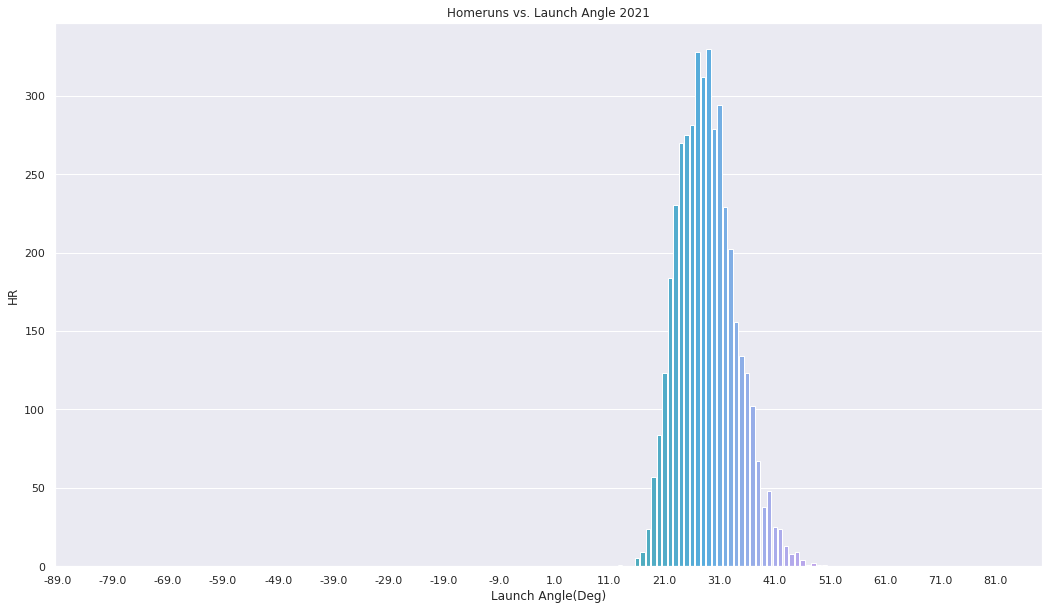

In [300]:
#Create barplot of Launch Angle and num. of homeruns
sns.set(rc={'figure.figsize':(17.7,10)})

plot_ = sns.barplot(data = df, x = 'Launch Angle(Deg)', y = 'HR')

#from https://stackoverflow.com/questions/38947115/how-to-decrease-the-density-of-x-ticks-in-seaborn/38947307
for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.title("Homeruns vs. Launch Angle 2021")